# Sequence to Sequence Models

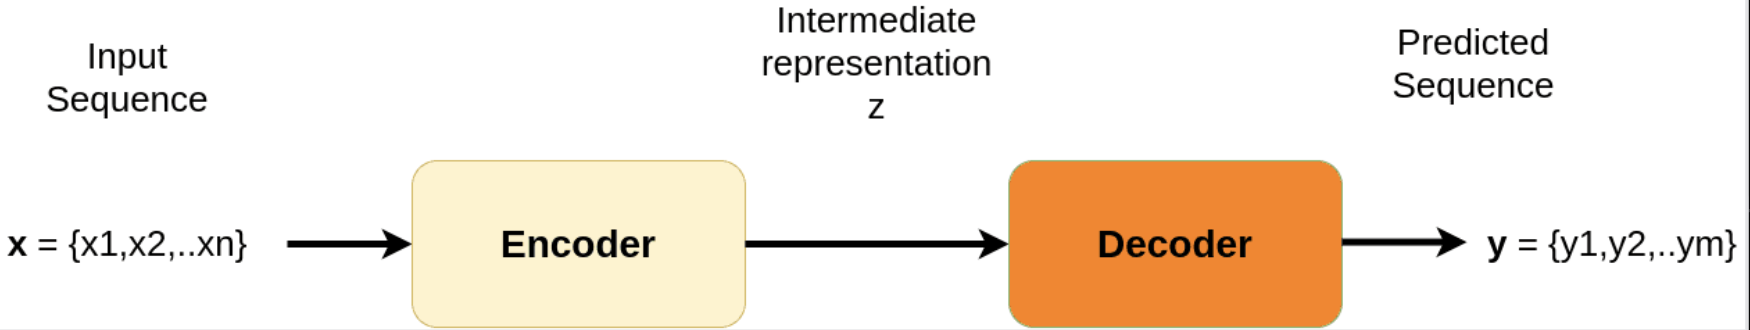

Ideally, a model has to understand the input sentence in one language. This is captured in the so-called “encoder”. It produces the intermediate representation, denoted as z, in the diagram.

We need to convert the meaning into another language, so let’s call this model decoder.

> The elements of the sequence x1, x2, etc. are usually called tokens. They can be literally anything.

The Recurrent Neural Networks (RNNs) we saw in previous lessons used to dominate Seq2Seq (Sequence to sequence) tasks.

The reason is simple: we liked to treat sequences sequentially. Sounds obvious and optimal? Attention mechanisms, and eventually transformers, proved that it was not!

In fact, RNN-based architectures used to work very well, especially with LSTM components.

The problem? Only for small sequences (<20 timesteps). 

# The limitations of RNNs
The main issue is that the intermediate representation z cannot encode information from all the input timesteps. This is commonly known as the bottleneck problem. The vector z needs to capture all the information about the source sentence.

In theory, mathematics indicates that this is possible. However, in practice, how far we can see in the past (the so-called reference window) is finite. The fact that we have limited data is an important factor. Hence, RNNs tend to forget information from timesteps that are far behind.

In most cases, the vector z will be unable to compress the information of the first few words as well as the 97th word.

Eventually, the system pays more attention to the last parts of the sequence. However, this is not usually the optimal way to approach a sequence task, and it is not compatible with the way humans translate or even understand language.

# Attention

Attention was born in order to address the limitations of Seq2Seq models.

> The core idea is that the context vector z should have access to all parts of the input sequence instead of just the last one.

## 1. What LSTMs Solved: Gradient Flow 🧠
You are right: LSTMs (and GRUs) were developed specifically to combat the traditional Recurrent Neural Network (RNN) problems of vanishing and exploding gradients.

- How They Solved It: By introducing the Cell State (c) and gates (Forget, Input, Output), LSTMs created an internal "information highway" that allows gradients to flow smoothly over many time steps. The gates regulate the flow of information, preventing the gradients from either shrinking to zero (vanishing) or growing uncontrollably (exploding).

- Result: LSTMs enabled training sequences that were much longer than traditional RNNs could handle, making deeper sequence models feasible.

## 2. What Attention Solved: The Fixed Context Bottleneck 🤯
Even with LSTMs, the Seq2Seq architecture suffered from a critical, inherent limitation:

### The Bottleneck Problem
In the classic Encoder-Decoder structure:

- The Encoder reads the entire input sequence (e.g., a sentence).

- It is forced to compress all the information from that long sequence into a single, fixed-size context vector (the final hidden state).

- This single vector must then serve as the sole source of input/memory for the Decoder to generate the entire output sequence.

### The Limitation:
For long, complex sequences (like a paragraph or a long technical sentence):

- The single context vector simply cannot hold all the necessary information.

- The model often forgets the beginning of the input sentence because the final hidden state is dominated by the most recent words.

### Attention's Solution
Attention addressed this by getting rid of the single context vector bottleneck:

- Mechanism: Attention allows the Decoder to look back at all of the Encoder's hidden states (not just the last one) at every step of generating the output.

- Dynamic Focus: Instead of relying on a single summary, the Decoder dynamically decides which parts of the input are most relevant for generating the next output token.

>In conclusion: While LSTMs fixed the mechanical problems of training deep RNNs, Attention fixed the structural problem of memory capacity in the Seq2Seq architecture. This led to a massive performance leap in tasks like Machine Translation and summarization.

In other words, we need to form a direct connection with each timestep.

This idea was originally proposed for computer vision. It was initially conceptualized like this: by looking at different parts of the image (glimpses), we can learn to accumulate information about a shape and classify the image accordingly.

The same principle was later extended to sequences. We can look at all the different words at the same time and learn to “pay attention“ to the correct ones depending on the task at hand.

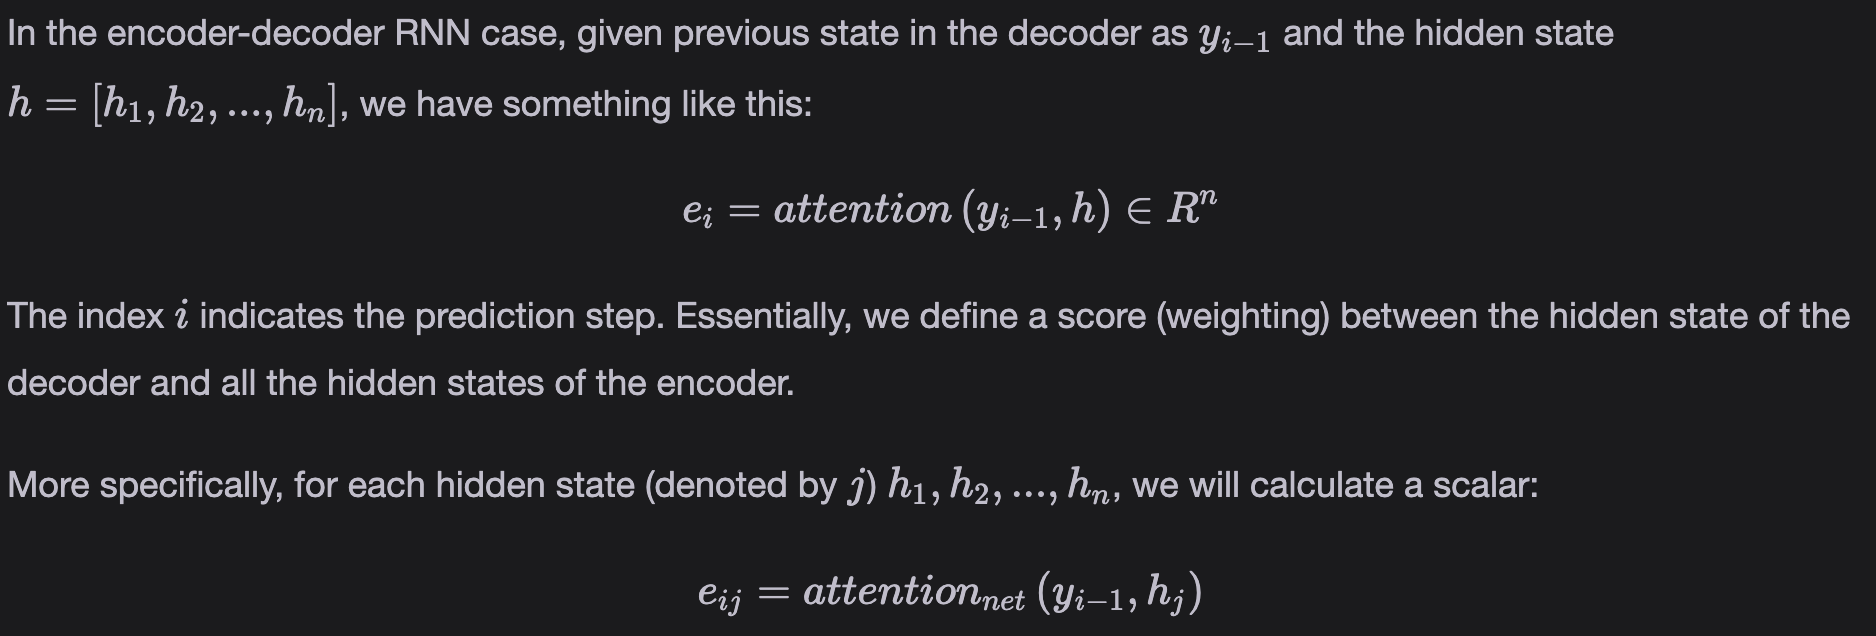

# 🧠 Understanding the Attention Mechanism in Sequence Models

This architecture, typically used in **Sequence-to-Sequence (Seq2Seq)** models, consists of two main **Recurrent Neural Networks (RNNs)** connected by the **Attention Mechanism**.

---

## 1. Explanation of the Attention Architecture

### A. The Encoder (Bottom, Yellow)
* **Function:** Reads the input sequence ($\mathbf{x}_1, \mathbf{x}_2, \ldots$) one step at a time.
* **Output:** Generates a sequence of **hidden states** ($\mathbf{h}^0, \mathbf{h}^1, \mathbf{h}^2, \mathbf{h}^3, \mathbf{h}^4, \ldots$) that summarizes the input at each time step. These hidden states hold the input information that the decoder needs to access.

### B. The Decoder (Top, Orange)
* **Function:** Generates the output sequence ($\mathbf{y}_1, \mathbf{y}_2, \ldots$) one step at a time.
* **The Problem (Solved by Attention):** Instead of relying only on a single, final context vector, the decoder uses **all** of the encoder's hidden states ($\mathbf{h}^j$) to decide the next output ($\mathbf{y}^i$).

### C. The Attention Mechanism (Center)
This mechanism connects the two RNNs:

1.  **Alignment Scores ($e_{ij}$):** The Attention neural net first compares the decoder's current state (implicitly $\mathbf{s}^{i-1}$) with **every** encoder hidden state ($\mathbf{h}^j$) to compute an **alignment score** ($e_{ij}$). This score measures how relevant $\mathbf{h}^j$ is to the next output word $\mathbf{y}^i$.
2.  **Attention Weights ($\alpha_{ij}$):** The scores $e_{ij}$ are passed through the **Softmax function** to produce the attention weights $\alpha_{ij}$.
3.  **Context Vector ($\mathbf{z}^i$):** The weights $\alpha_{ij}$ are used to compute a **weighted sum** of the encoder's hidden states:
    $$\mathbf{z}^i = \sum_{j=1}^{T_x} \alpha_{ij} \mathbf{h}^j$$
4.  **Decoder Input:** This new, **dynamic context vector** $\mathbf{z}^i$ is used by the decoder to produce the output $\mathbf{y}^i$.

---

## 2. Why Softmax is Used as Alpha ($\alpha_{ij}$)

The formula for $\alpha_{ij}$ is the Softmax function:

$$\alpha_{ij} = \frac{\exp(e_{ij})}{\sum_{k=1}^{T_x} \exp(e_{ik})}$$

Softmax is used because it fulfills two critical requirements:

### A. To Make it a Probability Distribution (The Primary Reason)
* **Requirement:** The attention weights $\alpha_{ij}$ must represent how much "attention" or "focus" should be placed on each input word. These weights **must sum up to 1.0**.
* **Softmax Effect:** By exponentiating the raw scores ($e_{ij}$) and dividing by the sum of all exponentiated scores, Softmax ensures that:
    $$\sum_{j=1}^{T_x} \alpha_{ij} = 1$$
* **Interpretation:** The weights $\alpha_{ij}$ are treated as a probability distribution over the input words. This allows the context vector $\mathbf{z}^i$ to be a **convex combination** of the input hidden states.

### B. To Make the Scores Far from Each Other (The Sharpening Effect)
* **Requirement:** For attention to be useful, the decoder shouldn't look equally at all input words. It needs to **sharply focus** on one or two critical words and ignore the rest.
* **Softmax Effect:** Due to the exponential function ($\exp(\ldots)$) in the numerator, Softmax **exaggerates the difference** between the raw alignment scores ($e_{ij}$).
    * A slightly higher score $e_{i, \text{relevant}}$ will result in a **much higher weight** $\alpha_{i, \text{relevant}}$.
    * A low score will be pushed very close to zero.
* **Interpretation:** This **sharpening effect** forces the model to make clear, decisive choices about which input parts are important, rather than distributing attention broadly and inefficiently. This is key to its success.

> **In summary, Softmax transforms the raw relevance scores into a normalized, sharpened probability distribution that dictates the precise focus for generating the next word.**

# 🧠 Detailed Mechanics of the Attention-Based Decoder

## 1. Explanation of the Decoder Block (Top, Orange)

The top orange block is indeed a sequence of **RNN blocks** that unfolds over time steps to generate the output sequence ($\mathbf{y}_1, \mathbf{y}_2, \ldots$).

* The output $\mathbf{y}_1$ is generated at the first step.
* The output represented by the final question mark (?) is generated at the last step (e.g., the word 'EOS' or 'end of sequence').

### Does each RNN block get the hidden state from its corresponding encoder block?
**No**, this is the key insight of the **Attention mechanism**. The decoder RNN does not get a corresponding hidden state from the encoder. Instead, at every single step $i$ where the decoder generates $\mathbf{y}^i$:

* It gets its **previous hidden state**, $\mathbf{h}^{i-1}$ (the decoder's internal memory).
* It uses $\mathbf{h}^{i-1}$ to calculate the **attention weights** ($\alpha_{ij}$) over **all** of the encoder's hidden states ($\mathbf{h}^1, \ldots, \mathbf{h}^{T_x}$).
* It generates a single, **dynamic context vector** ($\mathbf{z}^i$) by taking the weighted sum of all encoder hidden states, where:
    $$\mathbf{z}^i = \sum_{j=1}^{T_x} \alpha_{ij} \mathbf{h}^j$$
* The final input to the decoder's current RNN cell is typically a combination of the context vector ($\mathbf{z}^i$) and the previous output ($\mathbf{y}^{i-1}$).

> The decoder dynamically creates its own, specialized context $\mathbf{z}^i$ from the entire input sequence at every time step.

---

## 2. Why is the arrow from $\mathbf{y}^1$ pointing both up and down?

The arrow from $\mathbf{y}^1$ (the decoder's output word at the first step) serves two critical, standard purposes for an **autoregressive sequence model**:

* **Downwards (Final Output):** The primary purpose is to produce the output word/token $\mathbf{y}^1$ that gets added to the target sequence.
* **Upwards (Next Input):** The output $\mathbf{y}^1$ (after processing and usually becoming an embedding $\mathbf{y}^1$') is fed back as the **input** to the next RNN cell in the decoder. The output of the previous step dictates the input for the current step.

---

## 3. Explanation of Alpha ($\alpha_{ij}$) and Trainability

### Alpha is the Weighted Attention Score?
**Yes.** $\alpha_{ij}$ is the **Attention Weight** (or score). It tells the decoder, *"How important is the $j$-th input word to the $i$-th output word?"*

### Are the $\alpha_{ij}$ Weights Trainable?
**No**, the $\alpha_{ij}$ values themselves are **NOT** directly trainable parameters.

Instead:
* The $\alpha_{ij}$ values are calculated **dynamically at runtime** using the Attention Neural Net (the mechanism).
* The **weights of the Attention Neural Net** (the network that calculates the raw alignment score $e_{ij}$) **ARE** trainable parameters.
* The overall training process learns how to calculate attention scores that correctly assign high $\alpha$ to relevant input words.

### The Relationship Between $\mathbf{e}_{ij}$ and $\mathbf{\alpha}_{ij}$

The variable $\alpha_{ij}$ (the Attention Weight) is directly related to $e_{ij}$ (the raw Alignment Score) through the **Softmax function**:

$$\alpha_{ij} = \frac{\exp(e_{ij})}{\sum_{k=1}^{T_x} \exp(e_{ik})}$$

1.  **$e_{ij}$: The Raw Relevance Score**
    * $e_{ij}$ is the raw, unnormalized measure of relevance between the Decoder's current state and the $j$-th Encoder hidden state ($\mathbf{h}^j$).
    * It is calculated by the trainable **"Attention neural net"** (a small fully connected layer).
    * $e_{ij}$ can be any real number.

2.  **$\alpha_{ij}$: The Normalized Probability**
    * $\alpha_{ij}$ is the result of passing all the $e_{i\cdot}$ scores through the Softmax function. This transformation accomplishes two things:
        * **Normalization (Probability):** Ensures that all the $\alpha$ values for a single decoder step sum up to $1.0$ ($\sum \alpha_{ij}=1$).
        * **Sharpening (Focus):** The exponential function $\exp(\ldots)$ exaggerates differences in the raw scores, forcing the model to put a sharp focus on the most relevant input parts and push less relevant scores close to zero.

> **In essence, $e_{ij}$ tells you how much $\mathbf{h}^j$ matters, and $\alpha_{ij}$ tells you what proportion of the total attention should be given to $\mathbf{h}^j$.**

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

seed = 172
torch.manual_seed(seed)


class Attention(nn.Module):

    def __init__(self, y_dim: int, h_dim: int):
        super().__init__()
        #1. Define the vector dimensions and the trainable parameters
        self.y_dim = y_dim
        self.h_dim = h_dim
        self.W = nn.Parameter(torch.FloatTensor(self.y_dim, self.h_dim))
        pass

    def forward(self,
                y: torch.Tensor, # y.size() = (1, y_dim)
                h: torch.Tensor # h.size() = (1, h_dim)
                ):
        #2. Define the forward pass
        score = torch.matmul(y, torch.matmul(self.W, h.T)) # (1, y_dim) * ((y_dim, h_dim) * (h_dim, 1))
        score = F.softmax(score, dim = 0)
        
        return torch.matmul(score, h)
        